In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**EDA**

In [91]:
df.shape

(1338, 7)

In [92]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [96]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

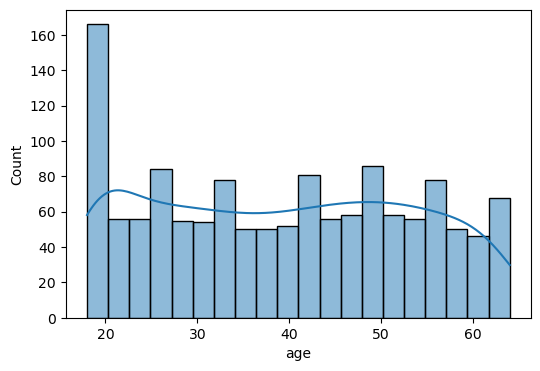

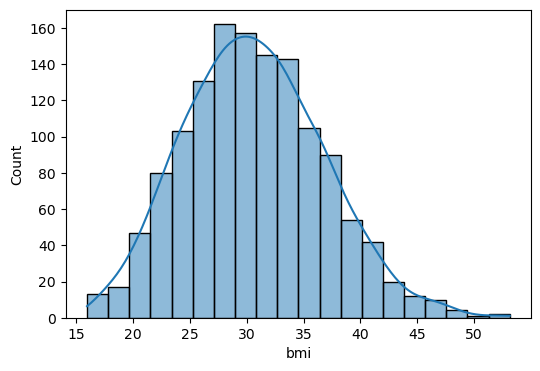

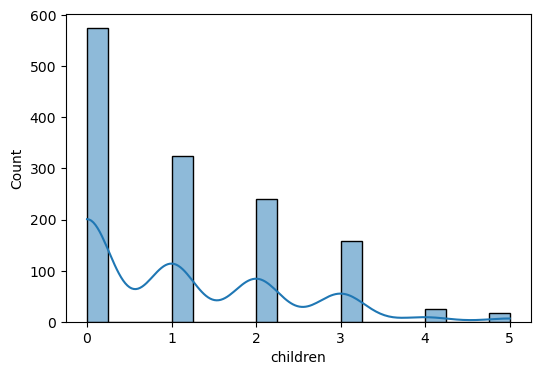

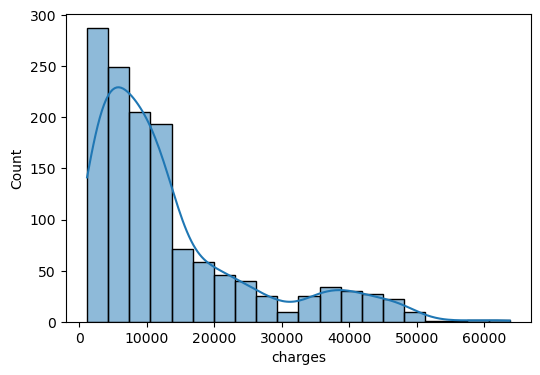

In [97]:
numeric_cols = ['age','bmi','children','charges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True, bins=20)

<Axes: xlabel='children', ylabel='count'>

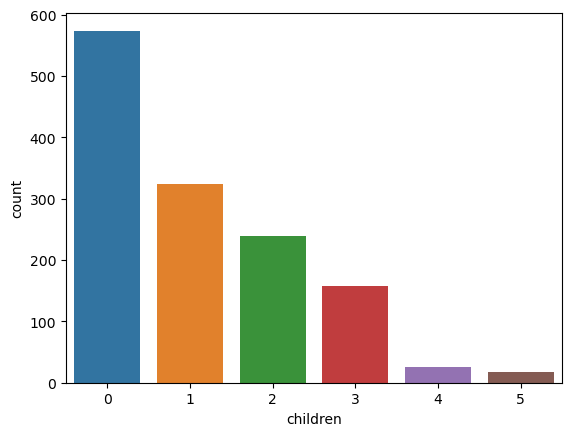

In [98]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

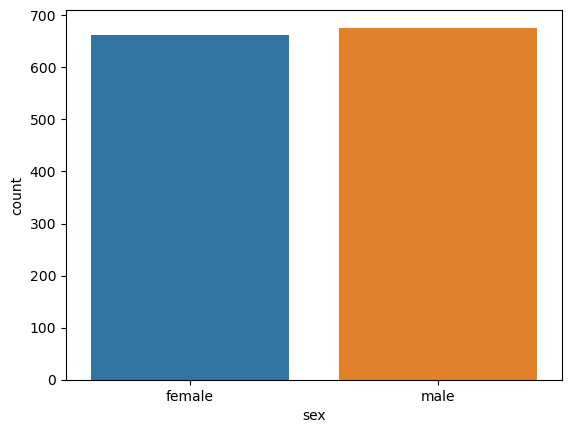

In [99]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

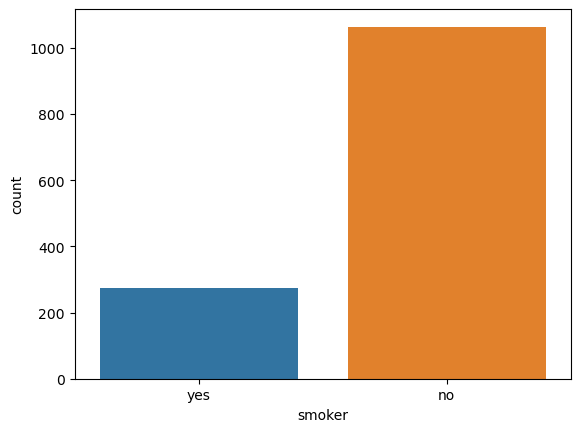

In [100]:
sns.countplot(x=df['smoker'])

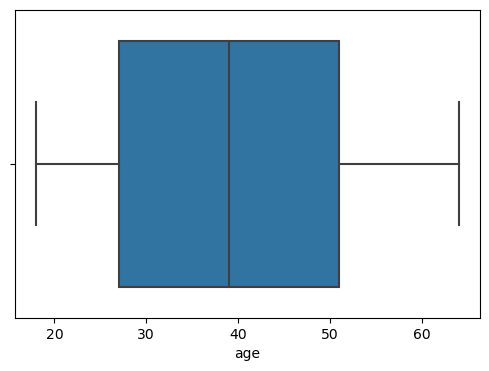

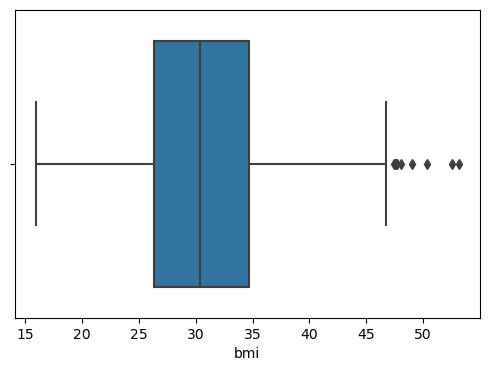

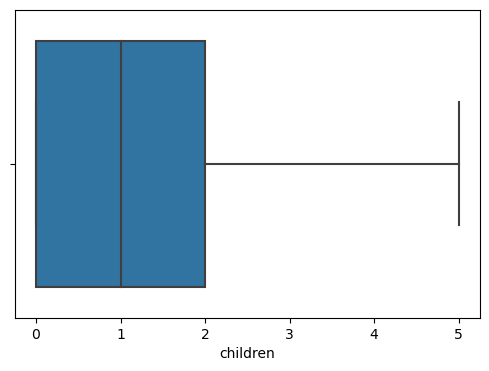

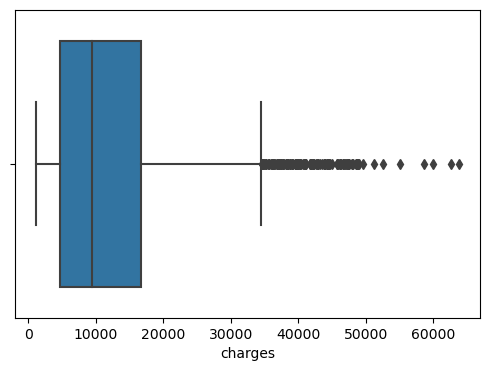

In [101]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

<Axes: >

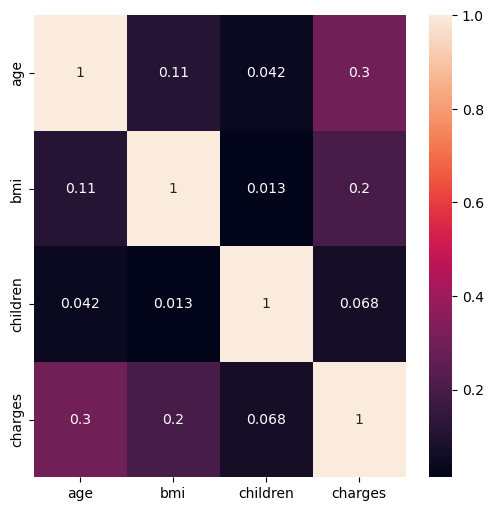

In [102]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Data Cleaning and Preprocessing**

In [103]:
df_cleaned = df.copy()
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [104]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
df_cleaned.shape

(1338, 7)

In [106]:
df_cleaned.drop_duplicates(inplace=True)

In [107]:
df_cleaned.shape

(1337, 7)

In [108]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [109]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [110]:
df_cleaned['sex'] = df_cleaned['sex'].map({"male":0,"female":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [111]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [112]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"yes":1,"no":0})

df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [113]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [114]:
df_cleaned= pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [115]:
df_cleaned.rename(columns={
    "sex":"is_female",
    "smoker":"is_smoker"
},inplace=True)

In [116]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [117]:
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


**Feature Engineering and Extraction**

<Axes: xlabel='bmi', ylabel='Count'>

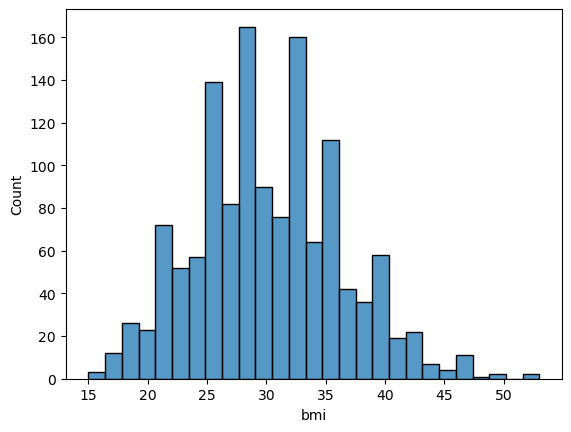

In [118]:
sns.histplot(df_cleaned['bmi'])

As we get to know that the we can use the BMI as a feature as the bmi has 3 categories: <br/>
Categories: The resulting number is used to broadly classify a person's weight status:<br/>  
Underweight: Below 18.5  <br/>
Normal weight: 18.5 to 24.9 <br/>
Overweight: 25.0 to 29.9  <br/>
Obese: 30.0 and above 

In [119]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=["Underweight","Normal","Overweight","Obese"]
)

In [120]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [121]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [122]:
df_cleaned  = df_cleaned.astype(int)


**Feature Scaling**
Feature Scaling transforms numerical values like age, BMI, and number of children into a smaller, uniform range (often 0 to 1). This helps the model compare features fairly and improves model performance, especially for distance-based and gradient-based algorithms.

In [123]:
from sklearn.preprocessing import StandardScaler
cols = ["age","bmi","children"]
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [124]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


Now we are going to find the cols who are higly related to the charges by using the correlation (Pearson Corrleation) with the Charges

In [125]:
from scipy.stats import pearsonr

#Fetures we are going to check against target
selected_features = [
    'age','bmi','is_female','children',	'is_smoker','charges'	,'region_northwest',	'region_southeast',	'region_southwest',	'bmi_category_Normal',	'bmi_category_Overweight',	'bmi_category_Obese'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlations_df.sort_values(by='Pearson Correlation', ascending=False)


,Feature,Pearson Correlation
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
11,bmi_category_Obese,0.200348
1,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
6,region_northwest,-0.038695
8,region_southwest,-0.043637
2,is_female,-0.058046


**Chi-Square Test**
Here we are using this to check the relation between the variables<br/>
catgegory <-> category

In [126]:
cat_features = [
    'is_female','is_smoker','charges','region_northwest',	'region_southeast',	'region_southwest',	'bmi_category_Normal',	'bmi_category_Overweight',	'bmi_category_Obese'
]

In [127]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05
# Crated bins of the charges as charges col is not categorical data hence by creating bins we form the categories of it in col - charges_bin
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_result = {}

for col in cat_features:
    contigency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat,p_val,_,_ = chi2_contingency(contigency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_result[col] = {
        'chi2_statistic':chi2_stat,
        'p_value':p_val,
        'Decision':decision
    }

 

In [128]:
chi2_df = pd.DataFrame(chi2_result).T
chi2_df = chi2_df.sort_values(by="p_value")
chi2_df


,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
charges,4011.0,0.033723,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


As you can see above the p_value < alpha (0.05) are the features having the significance and other than that other are need to remove so hence we use the chi-square test

In [129]:
final_df = df_cleaned[['age','bmi','is_female','children','is_smoker','region_southeast','charges','bmi_category_Obese']]
final_df

,age,bmi,is_female,children,is_smoker,region_southeast,charges,bmi_category_Obese
0,-1.440418,-0.517949,1,-0.909234,1,0,16884,0
1,-1.511647,0.462463,0,-0.079442,0,1,1725,1
2,-0.799350,0.462463,0,1.580143,0,1,4449,1
3,-0.443201,-1.334960,0,-0.909234,0,0,21984,0
4,-0.514431,-0.354547,0,-0.909234,0,0,3866,0
...,...,...,...,...,...,...,...,...
1333,0.767704,-0.027743,0,1.580143,0,0,10600,1
1334,-1.511647,0.135659,1,-0.909234,0,0,2205,1
1335,-1.511647,0.952670,1,-0.909234,0,1,1629,1
1336,-1.297958,-0.844753,1,-0.909234,0,0,2007,0
